<b>이미지 라벨링</b><br>
라벨링 파일(메터데이터)와 이미지 파일을 파일을 별도로 작업<br>
파일명으로 매칭

In [1]:
import os
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

In [2]:
import math
import numpy as np
from glob import glob
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [3]:
IMG_CHANNELS = 3
IMG_ROWS = 256
IMG_COLS = 256

In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
#define the convnet
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Convolution2D(256, (3, 3), activation='relu',
                        input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Convolution2D(128, (6, 6), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Convolution2D(64, (6, 6), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

### 폴더안의 폴더들(라벨) 을 리스트로

In [6]:
folder_name = 'data/'
all_folders = os.listdir(folder_name)

CLASSES = len(all_folders)  # 폴더 안의 폴더들

In [7]:
image_vector = []
labels_vector = []
for foldername in all_folders:
    forder_list = os.listdir(folder_name + foldername)
    for filename in forder_list:
        try:
            file_path = folder_name + foldername +'/'+ filename
            print(file_path)
            img = image.load_img(file_path, target_size=(IMG_ROWS, IMG_COLS))
            img_array = image.img_to_array(img)
            image_vector.append(img_array)
            labels_vector.append(all_folders.index(foldername))
        except:
            pass

data/lion/l_23.jpg
data/lion/l_25.jpg
data/lion/l_41.jpg
data/lion/l_8.jpg
data/m_산/m_1.jpg
data/m_산/m_10.jpg
data/m_산/m_100.jpg
data/m_산/m_101.jpg
data/m_산/m_102.jpg
data/m_산/m_103.jpg
data/m_산/m_104.jpg
data/m_산/m_105.jpg
data/m_산/m_106.jpg
data/m_산/m_107.jpg
data/m_산/m_108.jpg
data/m_산/m_109.jpg
data/m_산/m_11.jpg
data/m_산/m_110.jpg
data/m_산/m_111.jpg
data/m_산/m_112.jpg
data/m_산/m_113.jpg
data/m_산/m_114.jpg
data/m_산/m_115.jpg
data/m_산/m_116.jpg
data/m_산/m_117.jpg
data/m_산/m_118.jpg
data/m_산/m_119.jpg
data/m_산/m_12.jpg
data/m_산/m_120.jpg
data/m_산/m_121.jpg
data/m_산/m_122.jpg
data/m_산/m_123.jpg
data/m_산/m_124.jpg
data/m_산/m_125.jpg
data/m_산/m_126.jpg
data/m_산/m_127.jpg
data/m_산/m_128.jpg
data/m_산/m_129.jpg
data/m_산/m_13.jpg
data/m_산/m_130.jpg
data/m_산/m_131.jpg
data/m_산/m_132.jpg
data/m_산/m_133.png
data/m_산/m_134.jpg
data/m_산/m_135.jpg
data/m_산/m_136.jpg
data/m_산/m_137.jpg
data/m_산/m_138.jpg
data/m_산/m_139.jpg
data/m_산/m_14.jpg
data/m_산/m_140.png
data/m_산/m_141.jpg
data/m_산/m_142.png
d

c:\Users\crazy\miniconda3\envs\tf-gpu\lib\site-packages\PIL\Image.py:3368: DecompressionBombWarning: Image size (109542160 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


data/s_바다/s_6.jpeg
data/s_바다/s_6.jpg
data/s_바다/s_60.jpg
data/s_바다/s_61.jpg
data/s_바다/s_62.jpg
data/s_바다/s_63.jpg
data/s_바다/s_64.jpg
data/s_바다/s_65.jpg
data/s_바다/s_66.JPG
data/s_바다/s_67.jpg
data/s_바다/s_68.jpg
data/s_바다/s_69.jpg
data/s_바다/s_7.jpg
data/s_바다/s_70.jpg
data/s_바다/s_71.jpg
data/s_바다/s_72.jpg
data/s_바다/s_73.jpg
data/s_바다/s_74.jpg
data/s_바다/s_75.jpg
data/s_바다/s_76.jpg
data/s_바다/s_77.jpg
data/s_바다/s_78.jpg
data/s_바다/s_79.jpg
data/s_바다/s_8.jpg
data/s_바다/s_80.jpg
data/s_바다/s_81.jpg
data/s_바다/s_82.jpg
data/s_바다/s_83.jpg
data/s_바다/s_84.jpg
data/s_바다/s_85.jpg
data/s_바다/s_86.jpg
data/s_바다/s_87.jpg
data/s_바다/s_88.jpg
data/s_바다/s_89.jpg
data/s_바다/s_9.jpg
data/s_바다/s_90.jpg
data/s_바다/s_91.jpg
data/s_바다/s_92.jpg
data/s_바다/s_93.jpg
data/s_바다/s_94.jpg
data/s_바다/s_95.jpg
data/s_바다/s_96.JPG
data/s_바다/s_97.jpg
data/s_바다/s_98.jpg
data/s_바다/s_99.jpg
data/tigar/t_2.jpg
data/tigar/t_22.jpg
data/tigar/t_25.jpg
data/tigar/t_3.jpg
data/tigar/t_36.png


In [8]:
len(labels_vector)

364

In [9]:
image_vector[0].shape

(256, 256, 3)

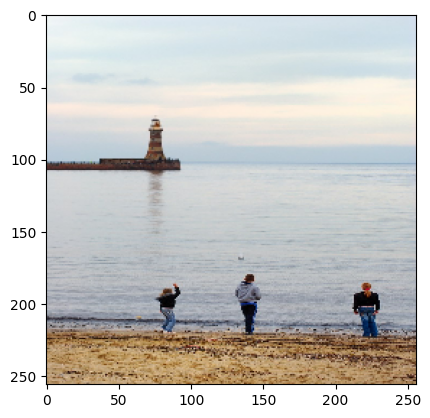

In [10]:
plt.imshow(image_vector[356]/255)

In [11]:
# numpy 배열로 변환
image_vector = np.array(image_vector)
labels_vector = np.array(labels_vector)

In [12]:
y = labels_vector

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=0)

In [14]:
X_train.shape

(291, 256, 256, 3)

In [15]:
X_train, X_test = X_train / 255, X_test / 255
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

In [16]:
y_train[2]

array([0., 0., 0., 1., 0.], dtype=float32)

In [17]:
CLASSES

5

In [18]:
model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 84, 84, 256)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 84, 84, 256)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 79, 79, 128)       1179776   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 128)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 26, 26, 128)       0

In [19]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=4, epochs=50, validation_split=0.1)

Epoch 1/50
66/66 [==============================] - 22s 209ms/step - loss: 1.3966 - accuracy: 0.5364 - val_loss: 0.9328 - val_accuracy: 0.3667
Epoch 2/50
66/66 [==============================] - 8s 124ms/step - loss: 1.0939 - accuracy: 0.4981 - val_loss: 0.7397 - val_accuracy: 0.6667
Epoch 3/50
66/66 [==============================] - 10s 156ms/step - loss: 1.0928 - accuracy: 0.5670 - val_loss: 0.9489 - val_accuracy: 0.6667
Epoch 4/50
66/66 [==============================] - 17s 253ms/step - loss: 1.0181 - accuracy: 0.5441 - val_loss: 0.8319 - val_accuracy: 0.7333
Epoch 5/50
66/66 [==============================] - 4s 59ms/step - loss: 1.0525 - accuracy: 0.6054 - val_loss: 0.7511 - val_accuracy: 0.7333
Epoch 6/50
66/66 [==============================] - 4s 64ms/step - loss: 0.9757 - accuracy: 0.6169 - val_loss: 0.9284 - val_accuracy: 0.6000
Epoch 7/50
66/66 [==============================] - 4s 61ms/step - loss: 0.9507 - accuracy: 0.6322 - val_loss: 0.9633 - val_accuracy: 0.6333
Epoch 

KeyboardInterrupt: 

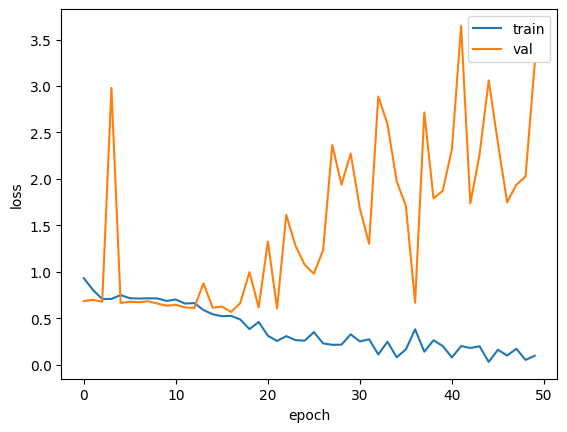

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

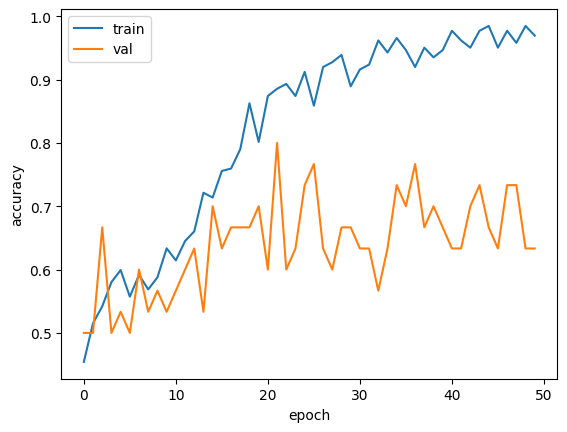

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','val'])
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test)
print("\nTest loss:", score[0])
print('Test accuracy:', score[1])

3/3 [==============================] - 1s 333ms/step - loss: 4.5752 - accuracy: 0.6486

Test loss: 4.575197696685791
Test accuracy: 0.6486486196517944


In [ ]:
X_test[27].shape

(256, 256, 3)

정답라벨: man 예측: woman


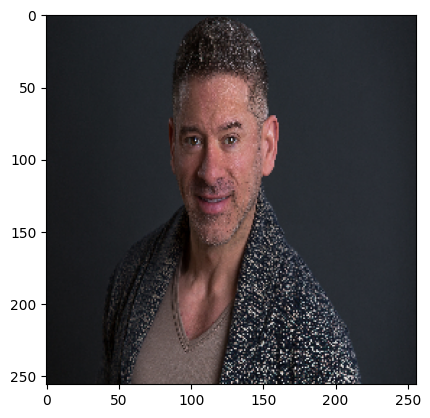

In [ ]:
i = 4
predicted = all_folders[model.predict(X_test[i].reshape(1,256,256,3), verbose=0).argmax()]
real = all_folders[y_test[i].argmax()]
print("정답라벨:",real, "예측:",predicted)
plt.imshow(X_test[i])
plt.show()  

In [ ]:
# for i in range(len(X_test)):
#     predicted = all_folders[model.predict(X_test[i].reshape(1,256,256,3), verbose=0).argmax()]
#     real = all_folders[y_test[i].argmax()]
#     if predicted != real:
#         print("정답라벨:",real, "예측:",predicted)
#         plt.imshow(X_test[i])
#         plt.show()
